In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set_theme(style="whitegrid")

file_path = '/Users/HP/Documents/project-team-4/ai_job_market.csv' 
df = pd.read_csv(file_path)

print("Dataset loaded successfully!")

Dataset loaded successfully!


In [2]:

print("--- First 5 Rows ---")
print(df.head())

print("\n--- Data Info ---")
print(df.info())

print("\n--- Missing Values ---")
print(df.isnull().sum())

print(f"\nDuplicate rows found: {df.duplicated().sum()}")

--- First 5 Rows ---
   job_id              company_name    industry                 job_title  \
0       1           Foster and Sons  Healthcare              Data Analyst   
1       2   Boyd, Myers and Ramirez        Tech  Computer Vision Engineer   
2       3                  King Inc        Tech          Quant Researcher   
3       4  Cooper, Archer and Lynch        Tech        AI Product Manager   
4       5                  Hall LLC     Finance            Data Scientist   

                                     skills_required experience_level  \
0  NumPy, Reinforcement Learning, PyTorch, Scikit...              Mid   
1                    Scikit-learn, CUDA, SQL, Pandas           Senior   
2          MLflow, FastAPI, Azure, PyTorch, SQL, GCP            Entry   
3       Scikit-learn, C++, Pandas, LangChain, AWS, R              Mid   
4                    Excel, Keras, SQL, Hugging Face           Senior   

  employment_type               location salary_range_usd posted_date  \
0   

In [3]:
df[['min_salary', 'max_salary']] = df['salary_range_usd'].str.split('-', expand=True).astype(float)

df['avg_salary'] = (df['min_salary'] + df['max_salary']) / 2

df['posted_date'] = pd.to_datetime(df['posted_date'])

categorical_cols = ['industry', 'experience_level', 'employment_type', 'company_size']
for col in categorical_cols:
    df[col] = df[col].str.strip()

print("Data cleaning and feature engineering complete.")

Data cleaning and feature engineering complete.


In [4]:
# Numerical summary
print("--- Statistical Summary of Salaries ---")
print(df[['min_salary', 'max_salary', 'avg_salary']].describe())

# Categorical counts
print("\n--- Job Counts by Industry ---")
print(df['industry'].value_counts())

print("\n--- Job Counts by Experience Level ---")
print(df['experience_level'].value_counts())

--- Statistical Summary of Salaries ---
          min_salary     max_salary     avg_salary
count    2000.000000    2000.000000    2000.000000
mean    95374.602000  150705.401000  123040.001500
std     31882.260505   41716.198452   34776.200983
min     40044.000000   54162.000000   47578.500000
25%     68234.500000  120751.250000   94466.250000
50%     95440.000000  151337.500000  123202.750000
75%    123580.500000  182200.000000  151413.000000
max    149975.000000  247578.000000  197776.500000

--- Job Counts by Industry ---
industry
Automotive    300
Education     294
Retail        293
E-commerce    291
Finance       279
Tech          274
Healthcare    269
Name: count, dtype: int64

--- Job Counts by Experience Level ---
experience_level
Entry     702
Mid       668
Senior    630
Name: count, dtype: int64


/var/folders/0z/t_l1f7_n1074l0p0g2mr8q480000gn/T/ipykernel_30762/2322946862.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='experience_level', y='avg_salary',


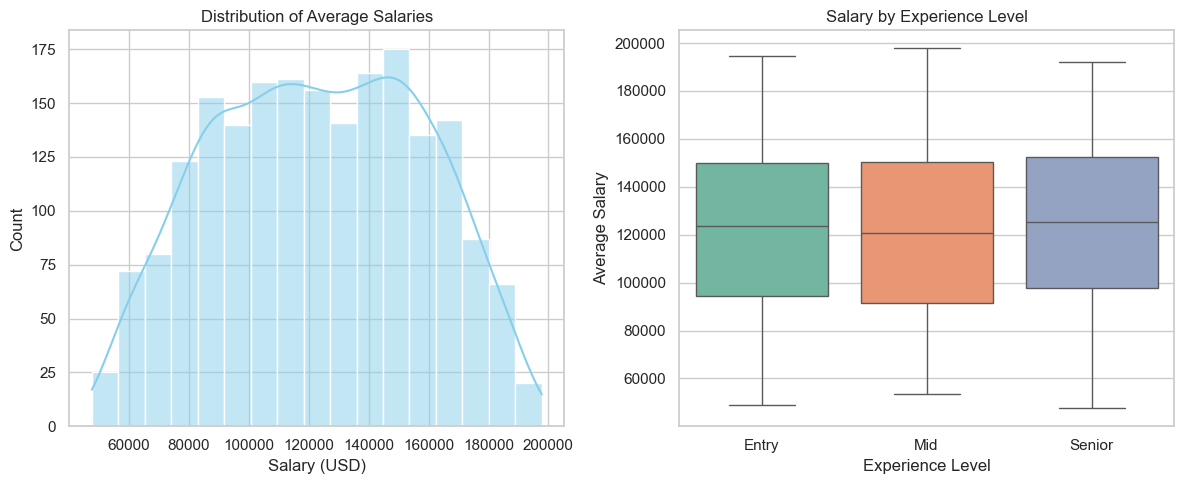

In [5]:
plt.figure(figsize=(12, 5))

# Histogram for Average Salary
plt.subplot(1, 2, 1)
sns.histplot(df['avg_salary'], kde=True, color='skyblue')
plt.title('Distribution of Average Salaries')
plt.xlabel('Salary (USD)')

# Boxplot for Salary by Experience Level
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='experience_level', y='avg_salary', 
            order=['Entry', 'Mid', 'Senior'], palette='Set2')
plt.title('Salary by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Average Salary')

plt.tight_layout()
plt.show()

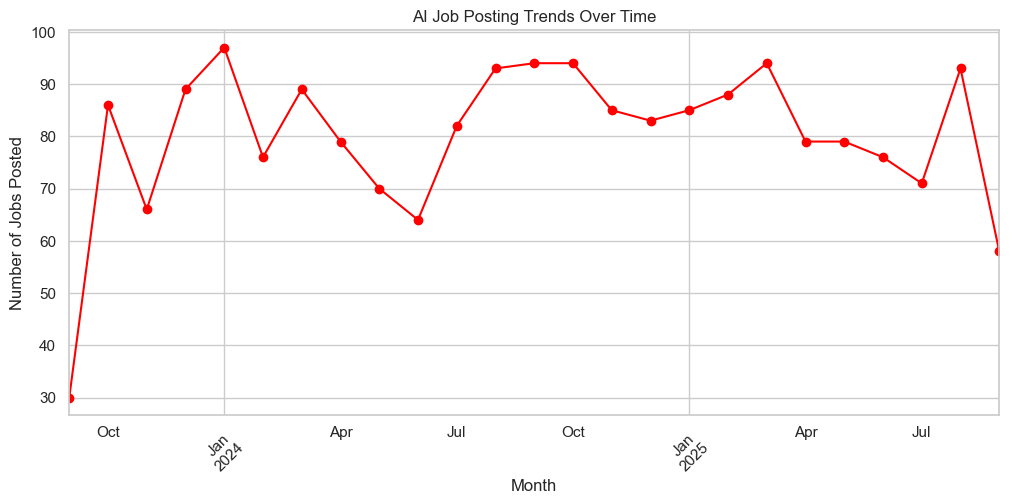

In [8]:
# Group by month and count job postings
df['month_year'] = df['posted_date'].dt.to_period('M')
monthly_jobs = df.groupby('month_year').size()

plt.figure(figsize=(12, 5))
monthly_jobs.plot(kind='line', marker='o', color='red')
plt.title('AI Job Posting Trends Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Jobs Posted')
plt.xticks(rotation=45)
plt.show()

/var/folders/0z/t_l1f7_n1074l0p0g2mr8q480000gn/T/ipykernel_30762/2093904078.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=industry_sal.values, y=industry_sal.index, palette='viridis')


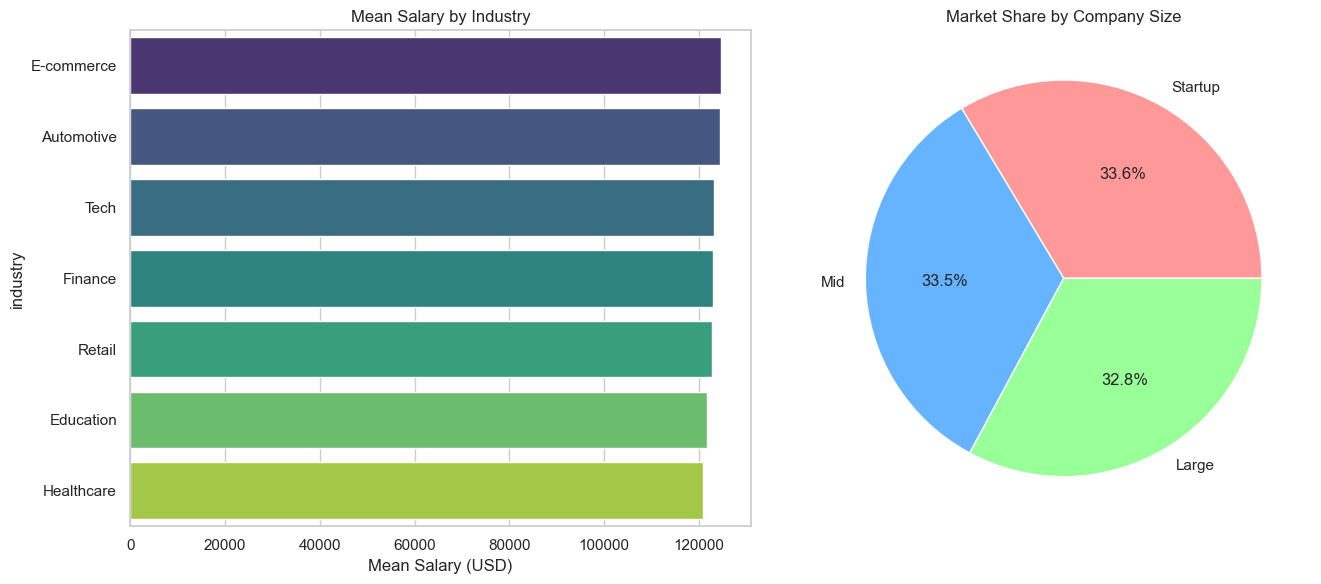

In [6]:
plt.figure(figsize=(14, 6))

# Average Salary by Industry
plt.subplot(1, 2, 1)
industry_sal = df.groupby('industry')['avg_salary'].mean().sort_values(ascending=False)
sns.barplot(x=industry_sal.values, y=industry_sal.index, palette='viridis')
plt.title('Mean Salary by Industry')
plt.xlabel('Mean Salary (USD)')

# Job Counts by Company Size
plt.subplot(1, 2, 2)
df['company_size'].value_counts().plot(kind='pie', autopct='%1.1f%%', 
                                      colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Market Share by Company Size')
plt.ylabel('')

plt.tight_layout()
plt.show()

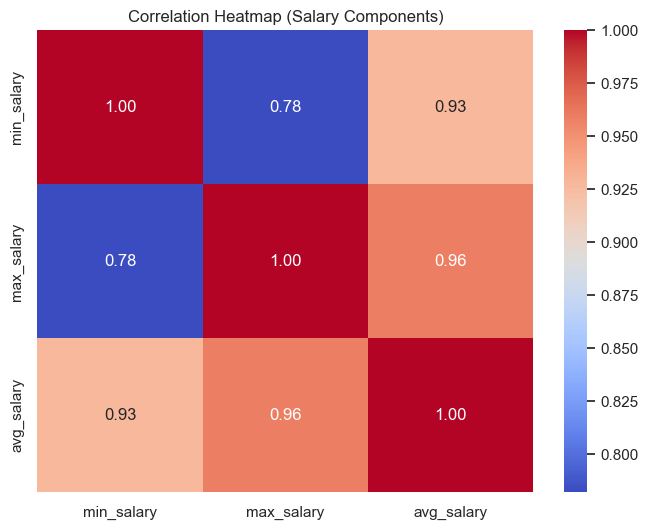

Cleaned data saved as 'cleaned_ai_job_market.csv'


In [7]:
plt.figure(figsize=(8, 6))
correlation_matrix = df[['min_salary', 'max_salary', 'avg_salary']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (Salary Components)')
plt.show()

# Final step: Save cleaned data for Model Training
df.to_csv('cleaned_ai_job_market.csv', index=False)
print("Cleaned data saved as 'cleaned_ai_job_market.csv'")